In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\Aman\\Desktop\\kifyaw10\\data\\BrentOilPrices.csv')


In [3]:
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Aman\AppData\Local\Temp\ipykernel_9012\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
# df_weekly = df.groupby('Week')['Price'].mean()

# df['Week'] = df['Date'].dt.strftime('%Y-%U')
# df['Month'] = df['Date']. dt.strftime('%Y-%m')

In [ ]:
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


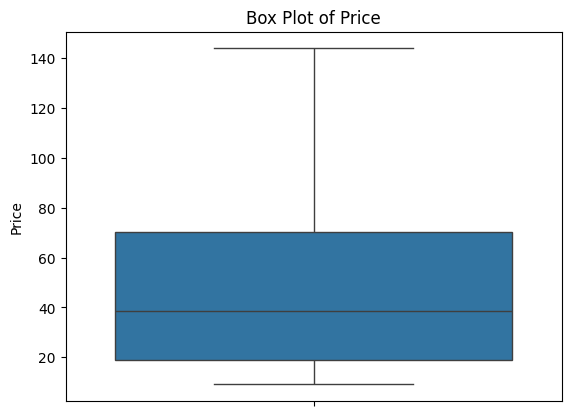

In [ ]:
sns.boxplot(y=df['Price'])
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()

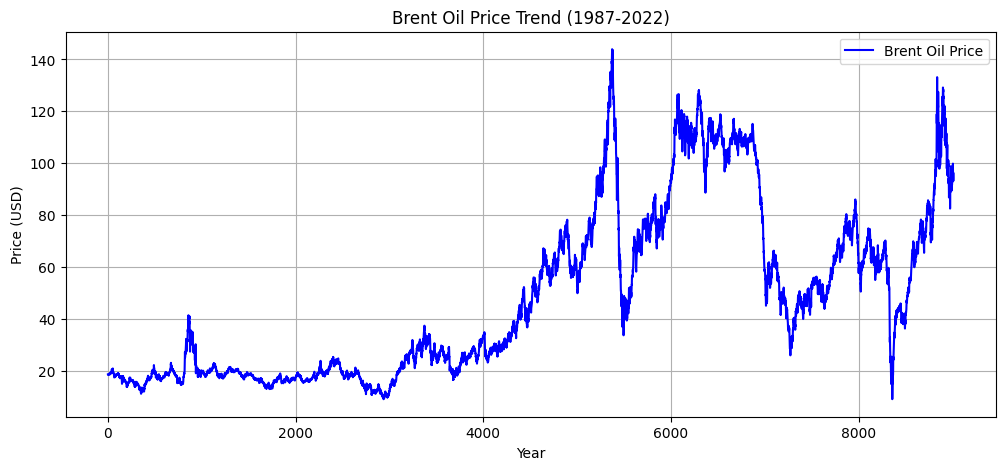

In [ ]:
# Set Date as index
df.set_index('Date')

# Plot Brent Oil Price Trend
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Price'], color='b', label='Brent Oil Price')
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.title("Brent Oil Price Trend (1987-2022)")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Compute Daily Price Change
df['Price_Change'] = df['Price'].pct_change()

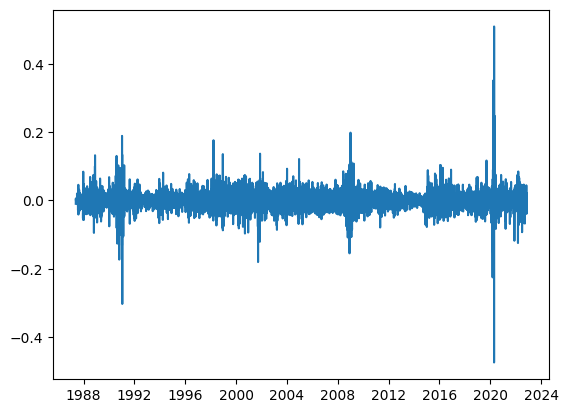

In [ ]:
plt.plot(df['Date'], df['Price_Change'])

In [22]:
df_siginificant_change = df[df['Price_Change'].abs()> 0.15]
df_siginificant_change

,Date,Price,Price_Change,Significant_Event,Significant_Event> 0.2
875,1990-10-22,27.45,-0.173193,True,False
931,1991-01-10,26.58,0.189262,True,False
936,1991-01-17,21.10,-0.303170,True,True
2754,1998-03-23,14.53,0.176518,True,False
3641,2001-09-24,20.63,-0.180373,True,False
5481,2008-12-05,37.04,-0.154917,True,False
5499,2009-01-02,42.94,0.198772,True,False
8330,2020-03-09,35.33,-0.225219,True,True
8335,2020-03-16,28.04,-0.150303,True,False
8347,2020-04-01,14.97,-0.219906,True,True


In [18]:
df_siginificant_change['Month_year'] = df_siginificant_change['Date'].dt.strftime('%Y-%m')
df_siginificant_change['Month_year']

C:\Users\Aman\AppData\Local\Temp\ipykernel_4672\1411453286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_siginificant_change['Month_year'] = df_siginificant_change['Date'].dt.strftime('%Y-%m')


936     1991-01
8330    2020-03
8347    2020-04
8348    2020-04
8349    2020-04
8359    2020-04
8360    2020-04
8369    2020-05
Name: Month_year, dtype: object

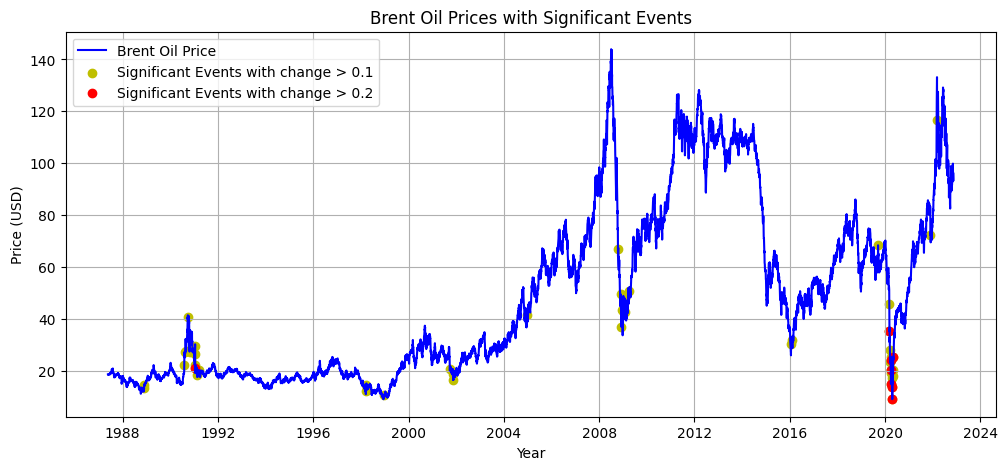

In [23]:


# Identify significant price spikes (absolute change > threshold)
threshold = 0.1  # Adjust based on data
df['Significant_Event'] = df['Price_Change'].abs() > threshold
df['Significant_Event> 0.2'] = df['Price_Change'].abs() > 0.2

# Plot Price with Significant Events
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price', color='b')
plt.scatter(df[df['Significant_Event']]['Date'], df[df['Significant_Event']]['Price'], color='y', label='Significant Events with change > 0.1', marker='o')
plt.scatter(df[df['Significant_Event> 0.2']]['Date'], df[df['Significant_Event> 0.2']]['Price'], color='r', label='Significant Events with change > 0.2', marker='o')
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.title("Brent Oil Prices with Significant Events")
plt.legend()
plt.grid(True)
plt.show()


ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287
❌ The data is non-stationary. Differencing is needed.


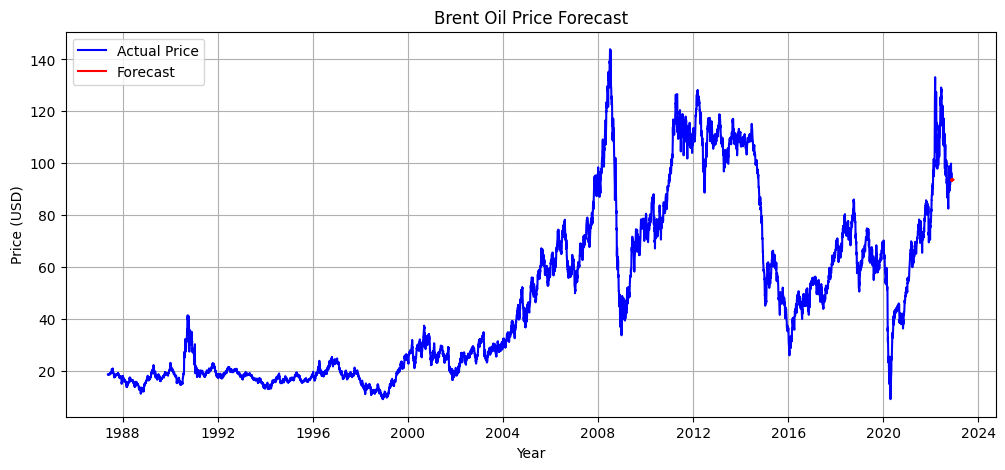

In [5]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Check Stationarity
result = adfuller(df['Price'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] < 0.05:
    print("✅ The data is stationary.")
else:
    print("❌ The data is non-stationary. Differencing is needed.")
# If non-stationary, take first difference
df['Price_Diff'] = df['Price'].diff().dropna()

# Fit ARIMA Model
model = ARIMA(df['Price'], order=(5,1,3))  # (p,d,q) values should be tuned
model_fit = model.fit()

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)

# Plot Forecast
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Price'], label="Actual Price", color="b")
plt.plot(pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D'), forecast, label="Forecast", color="r")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.title("Brent Oil Price Forecast")
plt.legend()
plt.grid(True)
plt.show()


Iteration:      1,   Func. Count:      6,   Neg. LLF: 3874927804.158277
Iteration:      2,   Func. Count:     12,   Neg. LLF: 70148.68734205695
Iteration:      3,   Func. Count:     19,   Neg. LLF: 924509187.1107914
Iteration:      4,   Func. Count:     27,   Neg. LLF: 44099.26204018903
Iteration:      5,   Func. Count:     33,   Neg. LLF: 41882.581755042986
Iteration:      6,   Func. Count:     39,   Neg. LLF: 41190.23335963133
Iteration:      7,   Func. Count:     46,   Neg. LLF: 40221.97253756566
Iteration:      8,   Func. Count:     52,   Neg. LLF: 38675.84139852016
Iteration:      9,   Func. Count:     58,   Neg. LLF: 46507.19984815386
Iteration:     10,   Func. Count:     64,   Neg. LLF: 52311.49939565074
Iteration:     11,   Func. Count:     73,   Neg. LLF: 39566.28900289833
Iteration:     12,   Func. Count:     79,   Neg. LLF: 37683.04414723057
Iteration:     13,   Func. Count:     85,   Neg. LLF: 38550.85348090723
Iteration:     14,   Func. Count:     91,   Neg. LLF: 48052.343

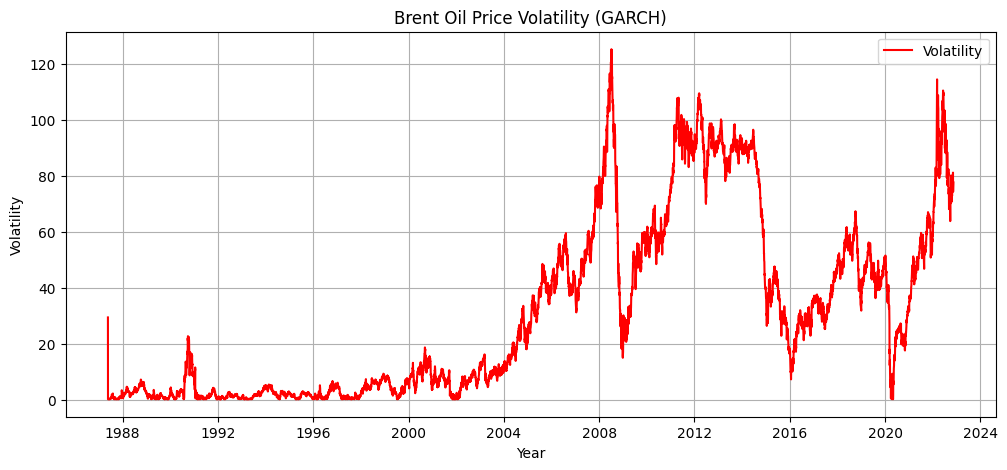

In [ ]:
from arch import arch_model

# Fit GARCH(1,1) Model
garch_model = arch_model(df['Price'].dropna(), vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()

# Forecast Volatility
vol_forecast = garch_fit.forecast(start=0, horizon=30)

# Plot Volatility
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], garch_fit.conditional_volatility, label="Volatility", color="r")
plt.xlabel("Year")
plt.ylabel("Volatility")
plt.title("Brent Oil Price Volatility (GARCH)")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
df['Predicted'] = model_fit.fittedvalues

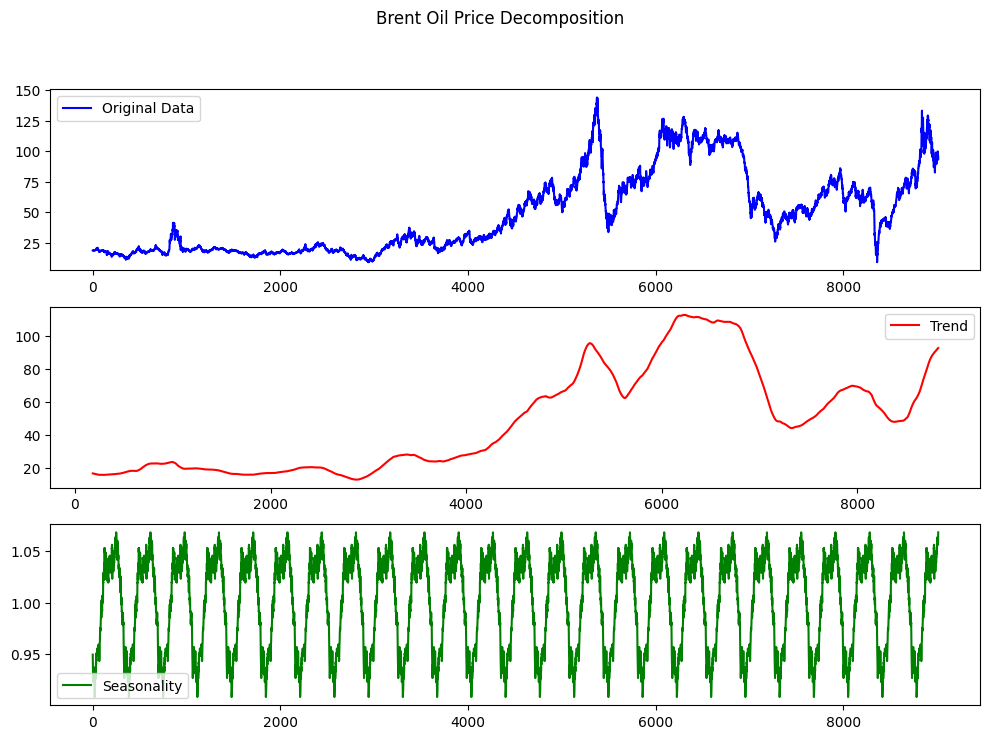

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series (Multiplicative or Additive model)
decomposition = seasonal_decompose(df["Price"], model="multiplicative", period=365)

# Plot decomposition
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
plt.plot(df.index, df["Price"], label="Original Data", color="blue")
plt.legend()

plt.subplot(3,1,2)
plt.plot(decomposition.trend, label="Trend", color="red")
plt.legend()

plt.subplot(3,1,3)
plt.plot(decomposition.seasonal, label="Seasonality", color="green")
plt.legend()

plt.suptitle("Brent Oil Price Decomposition")
plt.show()
